### Tworzenie środowiska wirtualnego venv

> python3 -m venv .env \
> source .env/bin/activate

### Instalowanie potrzebnych zależności

In [ ]:
!pip install torch pandas scikit-learn seaborn
!pip install 'numpy<2'

### Pobieramy dane z publicznie dostępnego zbioru danych (Breast Cancer Wisconsin Dataset)

In [2]:
import pandas as pd

# Oryginalne nazwy kolumn, które chcemy pobrać
columns = ['diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
    'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
    'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Wczytanie danych
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(url, header=None, names=columns)

# Zamiana etykiet 'M' (złośliwy) na 1 i 'B' (łagodny) na 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

### Podział danych na dane treningowe i testowe oraz skalowanie

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Przygotowanie danych: cechy i etykiety
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

# Podział na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Prezentacja danych

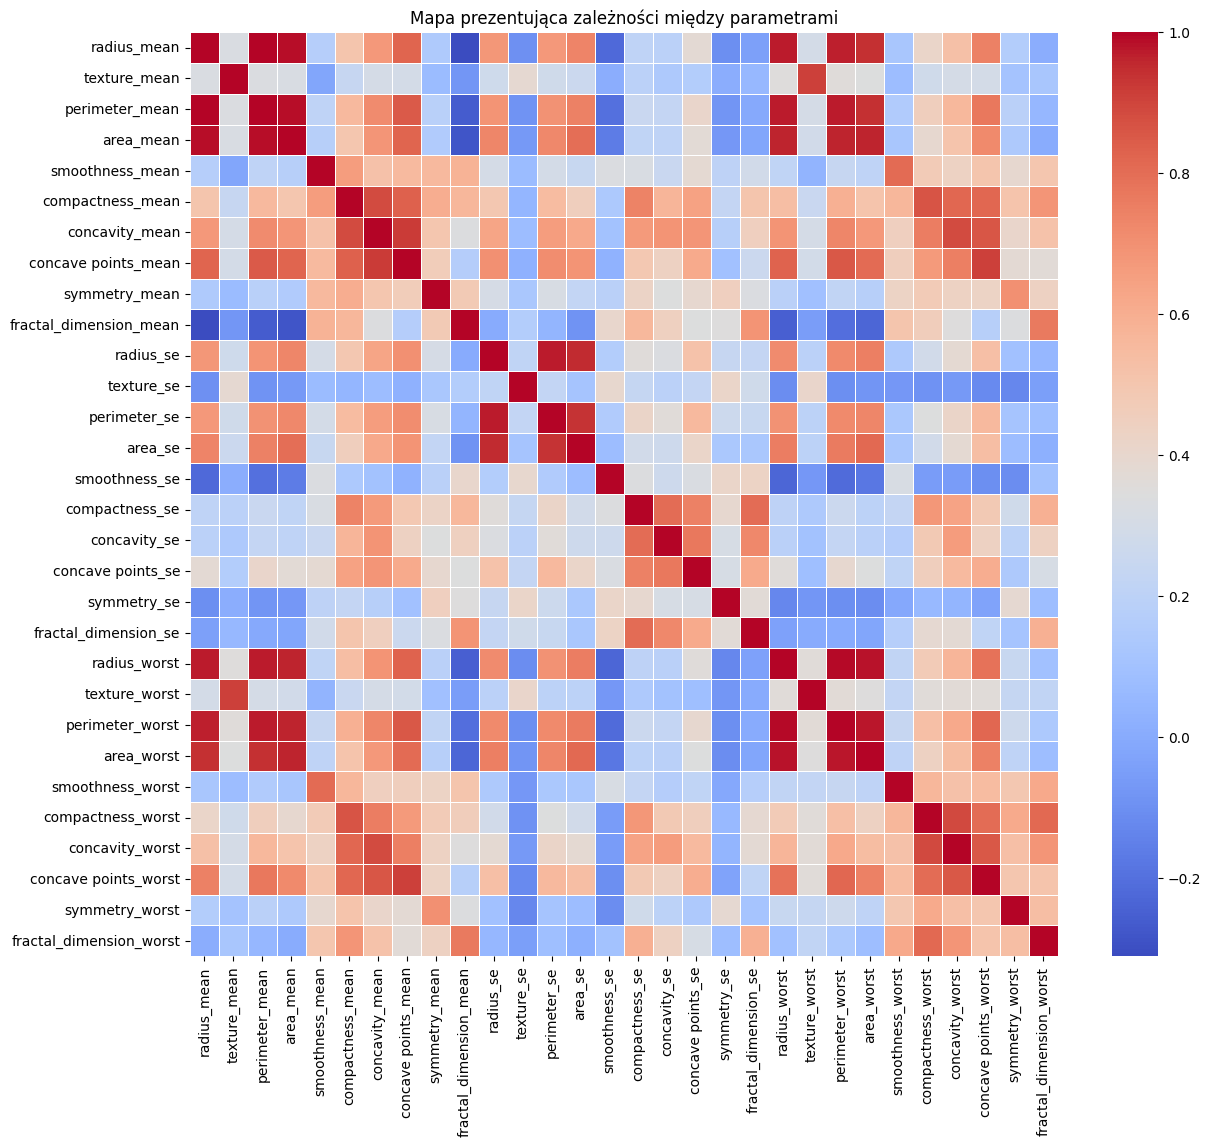

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obliczanie macierzy korelacji
correlation_matrix = data.drop(['diagnosis'], axis=1).corr()

# Tworzenie heatmapy
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa prezentująca zależności między parametrami')
plt.show()

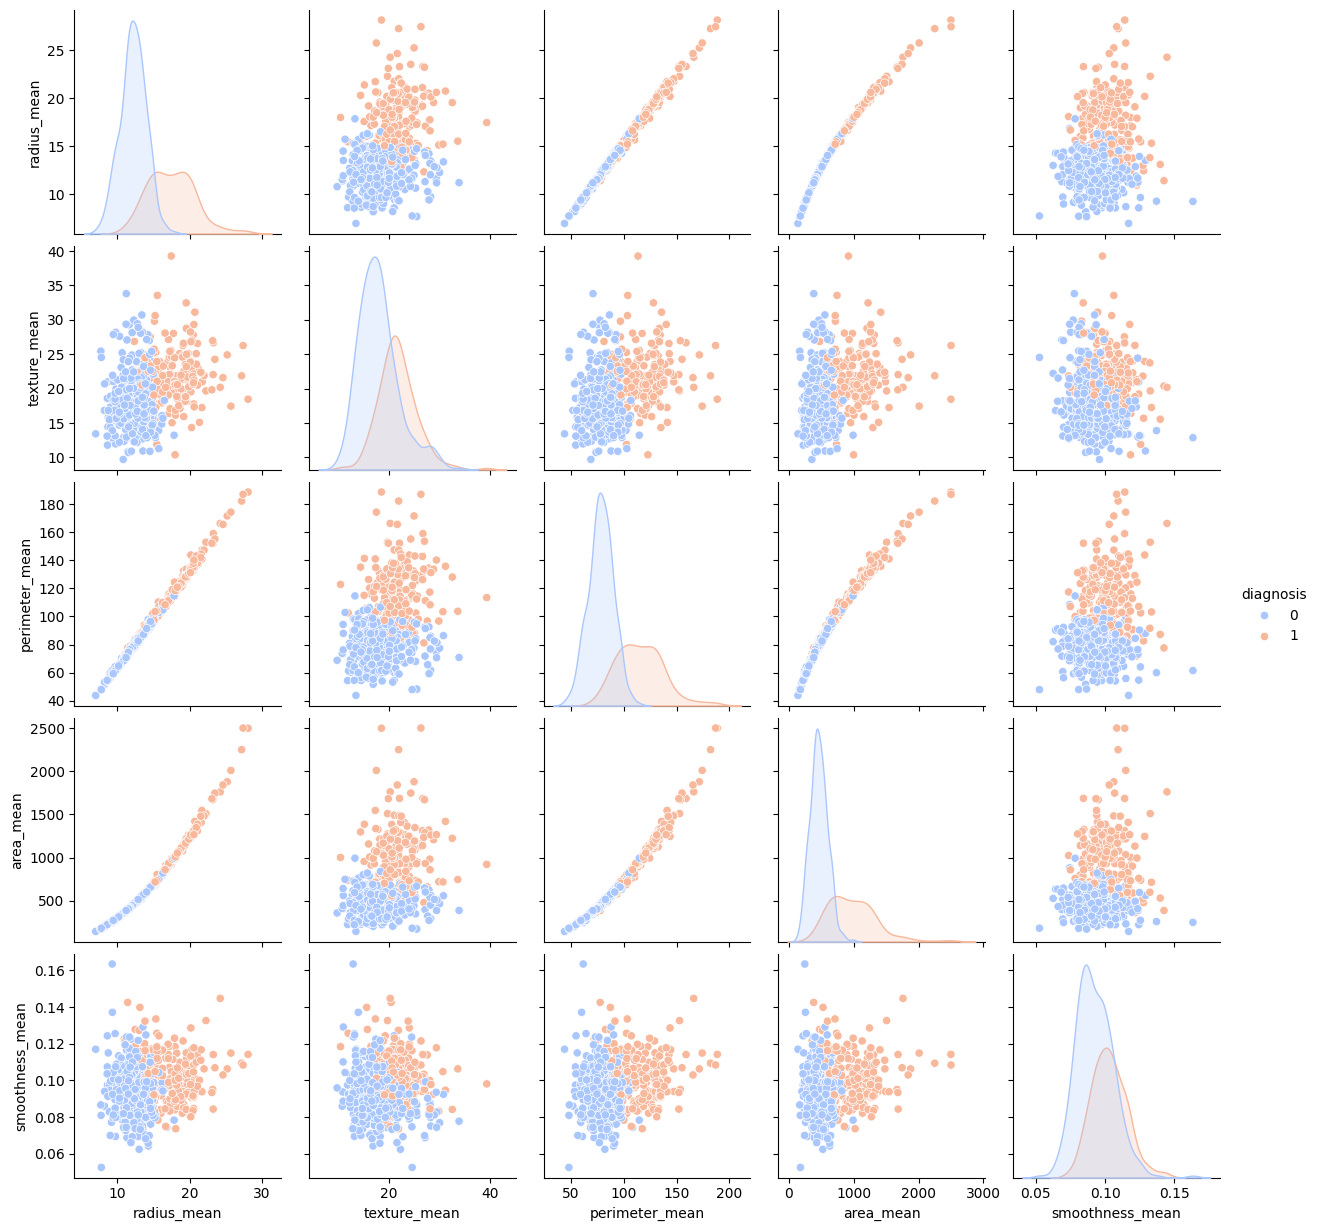

In [6]:
# Wybór kilku kluczowych cech do pairplot
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']

# Tworzenie pairplotu
sns.pairplot(data[selected_features], hue='diagnosis', palette='coolwarm')
plt.show()

### Hiperparametry treningu

In [7]:
LEARNING_RATE = 0.001
BATCH_SIZE = 32

### Konwersja danych na format tensorów + inicjalizacja obiektów ładujących dane

In [8]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Konwersja danych do tensorów PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Utworzenie datasetów i loaderów
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

### Definiujemy właściwy model sieci neuronowej

In [9]:
import torch.nn as nn

class BreastCancerModel(nn.Module):
    def __init__(self):
        super(BreastCancerModel, self).__init__()
        number_of_input_features = 30
        self.fc1 = nn.Linear(number_of_input_features, 128)  # 30 cech na wejściu -> 128 neuronów
        self.fc2 = nn.Linear(128, 64)  # warstwa 128 -> 64 neuronów
        self.fc3 = nn.Linear(64, 1)   # 1 neuron wyjściowy dla klasyfikacji binarnej (nowotwór złośliwy/łagodny)
    
    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))  # Funkcja Sigmoid idealna dla klasyfikacji binarnej (0/1)
        return x

model = BreastCancerModel()

### Funkcja błędu i optymalizator

In [10]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

### Funkcje do zapisu i załadowania modelu

In [11]:
def save_checkpoint(model, optimizer, episode, filename="model_checkpoint.pth"):
    checkpoint = {
        'episode': episode,  # Numer epoki, aby można było wznowić trening
        'model_state_dict': model.state_dict(),  # Wagi modelu
        'optimizer_state_dict': optimizer.state_dict()  # Parametry optymalizatora
    }
    torch.save(checkpoint, filename)  # Zapisujemy do pliku

def load_checkpoint(model, optimizer, filename):
    checkpoint = torch.load(filename)
    model.load_state_dict(checkpoint['model_state_dict'])  # Załaduj wagi modelu
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])  # Załaduj stan optymalizatora
    episode = checkpoint['episode']  # Załaduj numer epoki
    return episode

### Pętla treningowa modelu

In [12]:
num_epochs = 120                                # ilość iteracji treningowych (epok)

for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0
    for inputs, true_labels in train_loader:
        optimizer.zero_grad()                   # Zerujemy gradient

        outputs = model(inputs).squeeze()       # Forward pass + usuwamy nadmiarowe wymiary
        loss = criterion(outputs, true_labels)  # Liczymy błąd uczenia

        loss.backward()                         # Liczymy gradient (backward pass)
        optimizer.step()                        # Aktualizacja wag modelu

        training_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {training_loss/len(train_loader):.4f}")

    # Co 50 epok zapiszmy bieżący model
    if ((epoch + 1) % 50 == 0):
        save_checkpoint(model, optimizer, epoch+1, filename=f'breast_cancer_model_e{epoch+1}.pth')

save_checkpoint(model, optimizer, epoch+1, filename=f'breast_cancer_model_final.pth')

Epoch [1/120], Loss: 0.5546
Epoch [2/120], Loss: 0.2632
Epoch [3/120], Loss: 0.1357
Epoch [4/120], Loss: 0.0874
Epoch [5/120], Loss: 0.0789
Epoch [6/120], Loss: 0.0928
Epoch [7/120], Loss: 0.0581
Epoch [8/120], Loss: 0.0445
Epoch [9/120], Loss: 0.0424
Epoch [10/120], Loss: 0.0376
Epoch [11/120], Loss: 0.0337
Epoch [12/120], Loss: 0.0302
Epoch [13/120], Loss: 0.0316
Epoch [14/120], Loss: 0.0264
Epoch [15/120], Loss: 0.0232
Epoch [16/120], Loss: 0.0239
Epoch [17/120], Loss: 0.0399
Epoch [18/120], Loss: 0.0207
Epoch [19/120], Loss: 0.0160
Epoch [20/120], Loss: 0.0145
Epoch [21/120], Loss: 0.0129
Epoch [22/120], Loss: 0.0203
Epoch [23/120], Loss: 0.0104
Epoch [24/120], Loss: 0.0088
Epoch [25/120], Loss: 0.0081
Epoch [26/120], Loss: 0.0067
Epoch [27/120], Loss: 0.0061
Epoch [28/120], Loss: 0.0055
Epoch [29/120], Loss: 0.0053
Epoch [30/120], Loss: 0.0048
Epoch [31/120], Loss: 0.0040
Epoch [32/120], Loss: 0.0036
Epoch [33/120], Loss: 0.0034
Epoch [34/120], Loss: 0.0031
Epoch [35/120], Loss: 0

### Ewaluacja (testowanie) modelu

In [13]:
model.eval()  # Tryb ewaluacji
correct_answers = 0
total_answers = 0

with torch.no_grad():
    for inputs, true_labels in test_loader:
        outputs = model(inputs).squeeze()
        predicted = (outputs > 0.5).float()  # Używamy progu 0.5 do klasyfikacji binarnej 0/1
        total_answers += true_labels.size(0)
        correct_answers += (predicted == true_labels).sum().item()

print(f'Accuracy: {100 * correct_answers / total_answers:.2f}%')

Accuracy: 97.37%


### Przykład wykorzystania

In [49]:
# Opis zbadanej grupy podejrzanych komórek.
# Jednostki nie są oczywiste, ponieważ pomiary są wynikiem pomiaru
# mikroskopowego, zatem zależą m.in. od rozdzielczości przyrządu pomiarowego
radius_mean = 12.46
texture_mean = 4.04
perimeter_mean = 83.97
area_mean = 635.90
smoothness_mean = 0.1186
compactness_mean = 0.2396
concavity_mean = 0.4273
concave_points_mean = 0.085430
symmetry_mean = 0.2030
fractal_dimension_mean = 0.08243
radius_se = 0.2976
texture_se = 1.12
perimeter_se = 2.039
area_se = 23.94
smoothness_se = 0.007149
compactness_se = 0.07217
concavity_se = 0.07743
concave_points_se = 0.01432
symmetry_se = 0.011
fractal_dimension_se = 0.01008
radius_worst = 15.09
texture_worst = 40.68
perimeter_worst = 97.65
area_worst = 411.40
smoothness_worst = 0.1853
compactness_worst = 1.02
concavity_worst = 1.105
concave_points_worst = 0.221
symmetry_worst = 0.4366
fractal_dimension_worst = 0.2075

input_data_vector = torch.Tensor([radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, 
                        compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean,
                        radius_se, texture_se, perimeter_se, area_se, smoothness_se, 
                        compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se,
                        radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, 
                        compactness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst]) 

final_breast_cancer_model = BreastCancerModel()
scaled_input_vector = scaler.fit_transform(input_data_vector.unsqueeze(dim=1))                      # skalowanie danych
episode = load_checkpoint(final_breast_cancer_model, optimizer, 'breast_cancer_model_final.pth')    # ładowanie modelu
breast_cancer_prediction = final_breast_cancer_model(torch.Tensor(scaled_input_vector.squeeze()))   # predykcja

print(f'Prediction on cancer\'s type is: {breast_cancer_prediction.squeeze()*100:.2f}% malignant | Final prediction: {'malignant' if breast_cancer_prediction > 0.5 else 'benign'}')

Prediction on cancer's type is: 99.93% malignant | Final prediction: malignant
